In [84]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
driver=Chrome()
driver.get("https://books.toscrape.com")

In [37]:
def get_all_links(lis):
    categories_with_links={}
    for li in lis:
        a=li.find_element(By.TAG_NAME,"a")
        value=a.text.strip()
        link=a.get_attribute("href")
        categories_with_links[value]=link
    return categories_with_links



In [41]:
import json

sidebar=driver.find_element(By.CLASS_NAME, "side_categories")

nav_list=sidebar.find_element(By.CLASS_NAME, "nav-list")
ul=nav_list.find_element(By.TAG_NAME,"ul")
lis=ul.find_elements(By.TAG_NAME,"li")

links_dict=get_all_links(lis)
print(json.dumps(links_dict, indent=2))


{
  "Travel": "https://books.toscrape.com/catalogue/category/books/travel_2/index.html",
  "Mystery": "https://books.toscrape.com/catalogue/category/books/mystery_3/index.html",
  "Historical Fiction": "https://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html",
  "Sequential Art": "https://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html",
  "Classics": "https://books.toscrape.com/catalogue/category/books/classics_6/index.html",
  "Philosophy": "https://books.toscrape.com/catalogue/category/books/philosophy_7/index.html",
  "Romance": "https://books.toscrape.com/catalogue/category/books/romance_8/index.html",
  "Womens Fiction": "https://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html",
  "Fiction": "https://books.toscrape.com/catalogue/category/books/fiction_10/index.html",
  "Childrens": "https://books.toscrape.com/catalogue/category/books/childrens_11/index.html",
  "Religion": "https://books.toscrape.com/cata

In [79]:
from selenium.common.exceptions import NoSuchElementException
def get_num_books(link):
    driver.get(link)
    num_books=0
    while True:

        next_sibling = driver.find_element(By.CSS_SELECTOR, "header + *")

        section=next_sibling.find_element(By.TAG_NAME,"section")
        ol=section.find_element(By.TAG_NAME,"ol")
        lis=ol.find_elements(By.TAG_NAME,"li")
        num_books+=len(lis)

        try:
            next_button=section.find_element(By.CSS_SELECTOR,"ul.pager").find_element(By.CSS_SELECTOR,"li.next").find_element(By.TAG_NAME,"a")
            next_button.click()
            time.sleep(2)

        except NoSuchElementException:
            break
    return num_books


In [81]:
import time

category_number={}
for category,link in links_dict.items():
    category_number[category]=get_num_books(link)

print(json.dumps(category_number, indent=2))




{
  "Travel": 11,
  "Mystery": 32,
  "Historical Fiction": 26,
  "Sequential Art": 75,
  "Classics": 19,
  "Philosophy": 11,
  "Romance": 35,
  "Womens Fiction": 17,
  "Fiction": 65,
  "Childrens": 29,
  "Religion": 7,
  "Nonfiction": 110,
  "Music": 13,
  "Default": 152,
  "Science Fiction": 16,
  "Sports and Games": 5,
  "Add a comment": 67,
  "Fantasy": 48,
  "New Adult": 6,
  "Young Adult": 54,
  "Science": 14,
  "Poetry": 19,
  "Paranormal": 1,
  "Art": 8,
  "Psychology": 7,
  "Autobiography": 9,
  "Parenting": 1,
  "Adult Fiction": 1,
  "Humor": 10,
  "Horror": 17,
  "History": 18,
  "Food and Drink": 30,
  "Christian Fiction": 6,
  "Business": 12,
  "Biography": 5,
  "Thriller": 11,
  "Contemporary": 3,
  "Spirituality": 6,
  "Academic": 1,
  "Self Help": 5,
  "Historical": 2,
  "Christian": 3,
  "Suspense": 1,
  "Short Stories": 1,
  "Novels": 1,
  "Health": 4,
  "Politics": 3,
  "Cultural": 1,
  "Erotica": 1,
  "Crime": 1
}


In [83]:
df=pd.DataFrame(category_number.items(),columns=['category','book_count'])
df

,category,book_count
0,Travel,11
1,Mystery,32
2,Historical Fiction,26
3,Sequential Art,75
4,Classics,19
5,Philosophy,11
6,Romance,35
7,Womens Fiction,17
8,Fiction,65
9,Childrens,29


<function matplotlib.pyplot.show(close=None, block=None)>

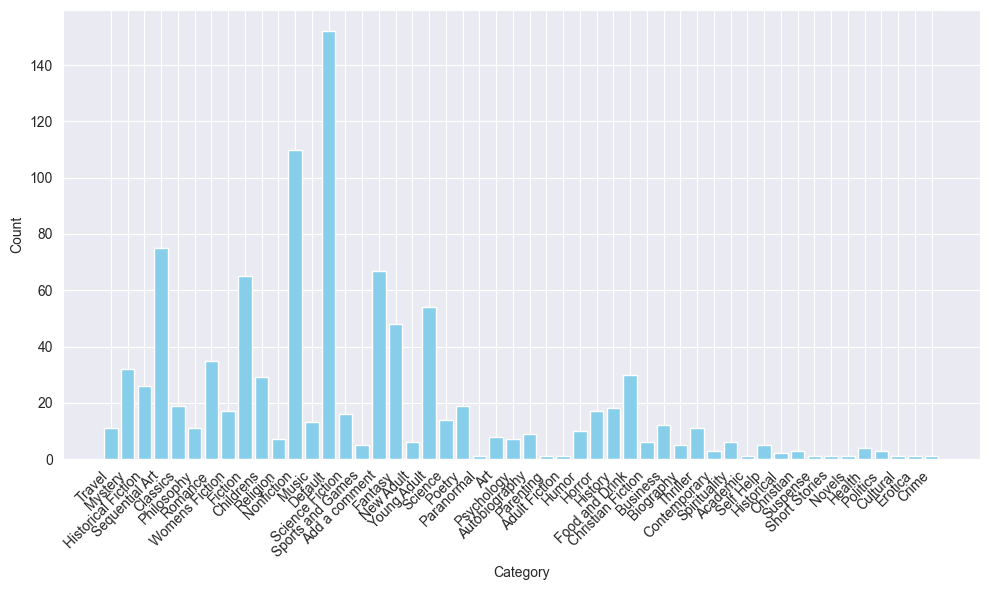

In [86]:
plt.figure(figsize=(10,6))
plt.bar(df['category'],df['book_count'],color='skyblue')
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show
